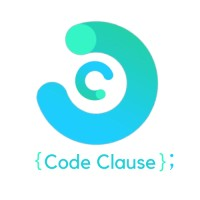

# Business advisor chatbot

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install newspaper3k

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: click in c:\users\91901\anaconda3\lib\site-packages (from nltk>=3.2.1->newspaper3k) (7.1.2)



In [3]:
#Import libraries 
from newspaper import Article 
import random
import string 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Download the punkt package 
nltk.download('punkt', quiet=True)

True

In [5]:
#Get the article 
article = Article('https://www.grantthornton.in/services/growth/business-consulting/')
article.download()
article.parse()
article.nlp()
corpus = article.text

In [6]:
#Print the articles text 
print(corpus)

The country’s eased regulatory scenario and improved ease of doing are increasingly offering opportunities to businesses to grow. We are engaged by family-owned businesses, private equity and venture capital funded businesses, widely-held companies and other organisations to assist them in developing and delivering strategic direction to the business.

We offer a bouquet of fully integrated strategic advisory services. Our extensive experience and in-depth knowledge combined with our collaborative approach helps dynamic businesses to grow.

Some of our key business consulting services include:

Strategy planning and implementation: These services are aimed at assisting the top management of an organisation in deciding the strategic direction and ensuring their functional heads buy into the vision of the organisation. We do this through the following:

CEO Room: It includes a strategic workshop customised to the client’s current business, operating model, geographic coverage, financial 

In [7]:
#Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text)  # A list of sentences

In [8]:
#Print the list of sentences 
print(sentence_list)

['The country’s eased regulatory scenario and improved ease of doing are increasingly offering opportunities to businesses to grow.', 'We are engaged by family-owned businesses, private equity and venture capital funded businesses, widely-held companies and other organisations to assist them in developing and delivering strategic direction to the business.', 'We offer a bouquet of fully integrated strategic advisory services.', 'Our extensive experience and in-depth knowledge combined with our collaborative approach helps dynamic businesses to grow.', 'Some of our key business consulting services include:\n\nStrategy planning and implementation: These services are aimed at assisting the top management of an organisation in deciding the strategic direction and ensuring their functional heads buy into the vision of the organisation.', 'We do this through the following:\n\nCEO Room: It includes a strategic workshop customised to the client’s current business, operating model, geographic c

In [9]:
# A function to return a simple greeting response to the users greetings
def greeting_response(text):
  text = text.lower()

# Bots greeting response
  bot_greetings = ['howdy', 'hi', 'hey', 'hello', 'hola']

#Users greeting
  users_greetings = ['hi', 'hey', 'hello', 'hola', 'greetings', 'wassup']
  for word in text.split():
          for word in users_greetings:
            return random.choice(bot_greetings)

In [10]:
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))

  x = list_var
  for i in range(length):
    for j in range(length):
      if x[list_index[i]] > x[list_index[j]]:
        #Swap
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

  return list_index

In [11]:
#Create the bots response
def bot_response(user_input):
  user_input = user_input.lower()
  sentence_list.append(user_input)
  bot_response = ''
  cm = CounterVectorizer().fit_transform(sentence_list)
  similarity_scores = cosine_similarity(cm[-1], cm)
  similarity_scores_list = similarity_scores.flatten()
  index = index_sort(similarity_scores_list)
  index = index[1:]
  response_flag = 0

  j = 0
  for i in range(len(index)):
    if similarity_scores_list[index[i]] > 0.0:
      bot_response = bot_response+'  '+sentence_list[index[i]]
      response_flag = 1
      j = j+1
    if j > 2:
      break
    
  if response_flag == 0:
    bot_response = bot_response+'  '+"I aplogize, I don't understand."


  sentence_list.remove(user_input)

  return bot_response

In [12]:
#Start the chat
print('CodeClause Bot: I am your business advisor for short . I will answer your queries about our services . If you want to exist, then type bye. ')


exit_list = ['exist', 'see you later', 'bye', 'quit', 'break']


while(True):
  user_input = input()
  if user_input.lower() in exit_list:
    print('CodeClause Bot: Chat with you later !')
    break
  else:
    if greeting_response(user_input) != None:
      print('CodeClause Bot: '+greeting_response(user_input))
    else:
      print('CodeClause Bot: '+bot_response(user_input))

CodeClause Bot: I am your business advisor for short . I will answer your queries about our services . If you want to exist, then type bye. 
hi
CodeClause Bot: hey
business
CodeClause Bot: hey
break
CodeClause Bot: Chat with you later !
